In [9]:
import numpy as np
from kernels import polynomial, RBF
from vkoga import vkoga
import matplotlib.pyplot as plt
%matplotlib inline

ker = RBF(rbf_type='gauss', ep=4)
#kernel = RBF(rbf_type='mat2', ep=4)
#ker = RBF(rbf_type='wen', ep=4)
#ker = polynomial(a=0, p=2)

f = lambda x: np.array([np.cos(10 * x), np.sin(10 * x)])[:,:,0].transpose()
X = np.random.rand(10000, 2)
y = X

model = vkoga(kernel=ker)

_, f_max, p_max = model.fit(X, y)

X_te = np.random.rand(10000, 2)
s_te = model.predict(X_te)
y_te = X_te
s = model.predict(X)


****************************** [VKOGA] ******************************
Training model with
       |_ kernel              : gauss [gamma = 4.00e+00]
       |_ regularization par. : 0.00e+00
       |_ restriction par.    : 0.00e+00

Training completed with
       |_ selected points     :      100 /      100
       |_ train residual      : 7.43e-05 / 1.00e-10
       |_ train power fun     : 1.59e-04 / 1.00e-10


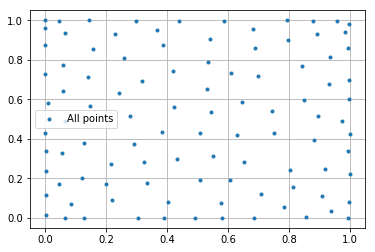

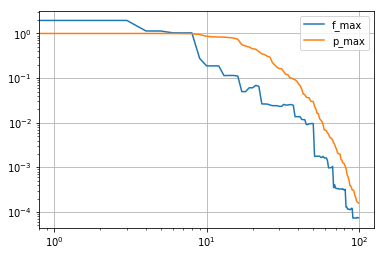

In [10]:
#%%
fig = plt.figure(1)
fig.clf()
ax = fig.gca()
#ax.plot(X[:, 0], X[:, 1], '.')
ax.plot(model.ctrs_[:, 0], model.ctrs_[:, 1], '.')
ax.legend(['All points', 'Selected points'])
ax.grid()
fig.show()

fig = plt.figure(2)
fig.clf()
ax = fig.gca()
ax.loglog(f_max)
ax.loglog(p_max)
ax.legend(['f_max', 'p_max'])
ax.grid()
fig.show()


In [14]:
#%%
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def vectorial_max_error(y_true, y_pred):
    return np.max(np.sum((y_true - y_pred) ** 2, axis=1))

vectorial_score = make_scorer(vectorial_max_error, greater_is_better=False)

params = {'reg_par': np.logspace(-10, 1, 12)}

#kernel=RBF(), verbose=True, greedy_type='p_greedy', reg_par=0, restr_par=0, tol_f=1e-10, tol_p=1e-10, max_iter=100)
  

model = GridSearchCV(vkoga(verbose=False), params, n_jobs=1, cv=5, refit=True, verbose=2, scoring=vectorial_score)  

model.fit(X, y)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] reg_par=1e-10 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... reg_par=1e-10, total=   0.6s
[CV] reg_par=1e-10 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .................................... reg_par=1e-10, total=   0.6s
[CV] reg_par=1e-10 ...................................................
[CV] .................................... reg_par=1e-10, total=   0.6s
[CV] reg_par=1e-10 ...................................................
[CV] .................................... reg_par=1e-10, total=   0.6s
[CV] reg_par=1e-10 ...................................................
[CV] .................................... reg_par=1e-10, total=   0.6s
[CV] reg_par=1e-09 ...................................................
[CV] .................................... reg_par=1e-09, total=   0.8s
[CV] reg_par=1e-09 ...................................................
[CV] .................................... reg_par=1e-09, total=   0.8s
[CV] reg_par=1e-09 ...................................................
[CV] .................................... reg_par=1e-09, total=   0.9s
[CV] reg_par=1e-09 ...................................................
[CV] .

[CV] ..................................... reg_par=10.0, total=   1.8s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=vkoga(greedy_type='p_greedy',
                             kernel=<kernels.RBF object at 0x7f9893318908>,
                             max_iter=100, reg_par=0, restr_par=0, tol_f=1e-10,
                             tol_p=1e-10, verbose=False),
             iid='warn', n_jobs=1,
             param_grid={'reg_par': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(vectorial_max_error, greater_is_better=False),
             verbose=2)

In [15]:
import pandas as pd
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_par,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.600235,0.023386,0.005188,0.000194,1e-10,{'reg_par': 1e-10},-6.694839e-11,-4.884925e-11,-6.418782e-11,-8.897286e-11,-6.561826e-11,-6.691531e-11,1.282217e-11,1
1,0.852953,0.130828,0.007362,0.000320,1e-09,{'reg_par': 1e-09},-9.777381e-11,-1.979634e-10,-8.764522e-11,-9.434550e-11,-2.312545e-10,-1.417965e-10,6.046388e-11,2
2,1.124408,0.010153,0.010337,0.000070,1e-08,{'reg_par': 1e-08},-6.368914e-10,-1.066794e-09,-6.997985e-10,-6.870705e-10,-1.898478e-09,-9.978064e-10,4.757296e-10,3
3,1.116793,0.007444,0.010341,0.000021,1e-07,{'reg_par': 1e-07},-5.750952e-09,-8.139740e-09,-6.707621e-09,-6.407815e-09,-1.046029e-08,-7.493283e-09,1.676439e-09,4
4,1.156029,0.076335,0.010385,0.000054,1e-06,{'reg_par': 1e-06},-6.030800e-08,-5.870244e-08,-5.305135e-08,-6.104141e-08,-7.610115e-08,-6.184087e-08,7.660939e-09,5
5,1.117596,0.004770,0.010391,0.000018,1e-05,{'reg_par': 1e-05},-4.355279e-07,-4.428367e-07,-4.338932e-07,-4.745839e-07,-4.902943e-07,-4.554272e-07,2.280750e-08,6
6,1.144538,0.031251,0.010824,0.000709,0.0001,{'reg_par': 0.0001},-4.638478e-06,-5.689230e-06,-5.233764e-06,-5.537857e-06,-5.283383e-06,-5.276543e-06,3.598887e-07,7
7,1.356834,0.260475,0.010501,0.000298,0.001,{'reg_par': 0.001},-4.349992e-05,-4.197153e-05,-4.456635e-05,-4.223600e-05,-4.118396e-05,-4.269155e-05,1.197258e-06,8
8,1.464254,0.548725,0.010843,0.000790,0.01,{'reg_par': 0.01},-2.267573e-04,-2.324623e-04,-2.481052e-04,-2.295026e-04,-2.436238e-04,-2.360902e-04,8.303958e-06,9
9,1.369613,0.258011,0.012961,0.004904,0.1,{'reg_par': 0.1},-3.065220e-03,-2.983894e-03,-3.108977e-03,-3.125487e-03,-3.245227e-03,-3.105761e-03,8.525902e-05,10


In [ ]:
model.predict(X)